<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/Prophet_Base_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Case for Prophet data on New York City

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

## Load Data and Preprocessing

### August 27th Data

#### Load August 27th Data

In [3]:
NY_labeledData_Aug27 = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_labeledData_Aug27.csv',low_memory=False)
print(NY_labeledData_Aug27.shape)

(9690, 18)


#### Preprocessing 

In [4]:
NY_labeledData_Aug27 = NY_labeledData_Aug27.astype({'label': 'string'})

In [5]:
NY_labeledData_Aug27 = NY_labeledData_Aug27.dropna()

In [6]:
NY_labeledData_Aug27['label_y'] = preprocessing.LabelEncoder().fit_transform(NY_labeledData_Aug27['label'])

In [7]:
NY_labeledData_Aug27.rename(columns={'Date': 'ds', 'label_y': 'y'}, inplace=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(NY_labeledData_Aug27, NY_labeledData_Aug27['y'], test_size=0.33, random_state=42)

In [9]:
NY_labeledData_Aug27.dtypes

ds                        object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
label                     string
y                          int64
dtype: object

In [10]:
NY_labeledData_Aug27.head()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,y
0,2020-03-01,36001,Albany County,10.0,13.0,19.0,4.0,7.0,-1.0,-4.87,2.616,54,584.364958,0,0.0,0,0.0,LessSpread,0
1,2020-03-01,36003,Allegany County,47.0,13.0,0.0,0.0,1.0,0.0,19.81,0.707,12,44.778541,0,0.0,0,0.0,LessSpread,0
2,2020-03-01,36123,Yates County,31.0,33.0,0.0,0.0,7.0,0.0,28.14,5.004,72,73.676584,0,0.0,0,0.0,LessSpread,0
3,2020-03-01,36119,Westchester County,8.0,-1.0,12.0,1.0,0.0,0.0,-4.34,3.903,59,2247.400697,0,0.0,0,0.0,LessSpread,0
4,2020-03-01,36031,Essex County,16.0,11.0,17.0,0.0,1.0,0.0,60.18,12.600,197,20.557565,0,0.0,0,0.0,LessSpread,0


In [11]:
NY_labeledData_Aug27.tail()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,y
9685,2020-08-19,36099,Seneca County,0.0,0.0,0.0,0.0,0.0,0.0,162.86,6.632,98,105.081709,1,0.864,0,0.571429,LessSpread,0
9686,2020-08-19,36023,Cortland County,0.0,0.0,0.0,0.0,0.0,0.0,85.52,3.803,141,95.398588,1,0.803,0,0.142857,LessSpread,0
9687,2020-08-19,36101,Steuben County,0.0,0.0,0.0,0.0,0.0,0.0,103.47,5.512,88,68.590352,1,0.674,0,1.000000,LessSpread,0
9688,2020-08-19,36103,Suffolk County,0.0,0.0,0.0,0.0,0.0,0.0,60.19,5.039,58,1618.991283,1,0.782,70,51.000000,LessSpread,0
9689,2020-08-19,36123,Yates County,0.0,0.0,0.0,0.0,0.0,0.0,350.22,6.347,91,73.676584,1,0.884,0,0.285714,LessSpread,0


### August 26 Data

#### Load August 26 Data

In [12]:
NY_labeledData_Aug26 = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_sd_inertia_labeledData_Aug26.csv',low_memory=False)
print(NY_labeledData_Aug26.shape)

FileNotFoundError: ignored

In [13]:
NY_labeledData_Aug26.head()

NameError: ignored

## Prophet Model Implementation for August 27rd

In [14]:
prophet_model = Prophet()

In [15]:
prophet_model.fit(X_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = prophet_model.make_future_dataframe(periods=14)
future.tail()

,ds
6501,2020-08-29
6502,2020-08-30
6503,2020-08-31
6504,2020-09-01
6505,2020-09-02


In [17]:
forecast = prophet_model.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

periods in phophet (Verify)

### Plot forecast

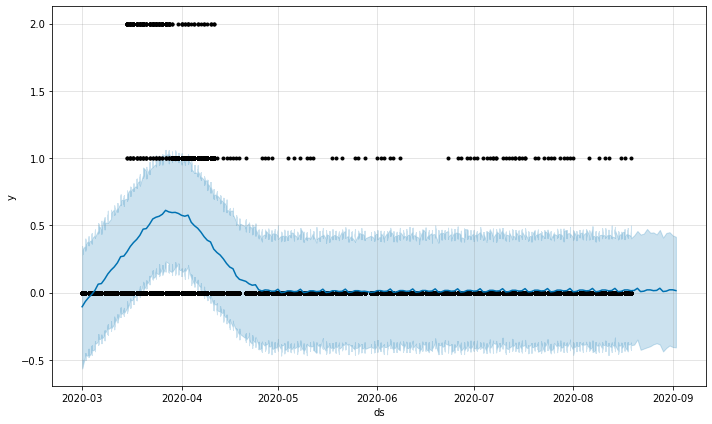

In [18]:
fig1 = prophet_model.plot(forecast)

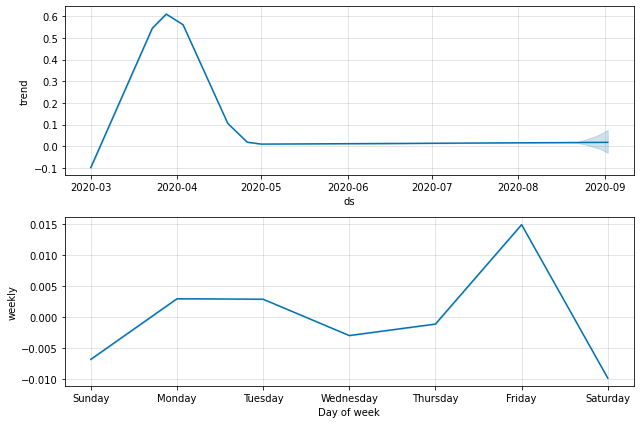

In [19]:
fig2 = prophet_model.plot_components(forecast)

In [20]:
plot_plotly(prophet_model, forecast)

In [21]:
plot_components_plotly(prophet_model, forecast)

### Diagnostics

In [26]:
# 172 total days of data (30%)
df_cv = cross_validation(prophet_model, initial='120 days', period='14 days', horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-07-06 00:00:00 and 2020-07-20 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-07,0.009997,-0.430138,0.488878,0,2020-07-06
1,2020-07-07,0.009997,-0.440543,0.505235,0,2020-07-06
2,2020-07-07,0.009997,-0.476460,0.499738,0,2020-07-06
3,2020-07-07,0.009997,-0.461637,0.493898,0,2020-07-06
4,2020-07-07,0.009997,-0.475145,0.489613,0,2020-07-06


In [ ]:
#cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
#df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

In [23]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,4 days,0.021582,0.146909,0.041912,inf,0.978184
1,5 days,0.022055,0.148509,0.040929,inf,0.977597
2,6 days,0.025632,0.160101,0.042159,inf,0.974026
3,7 days,0.020851,0.144399,0.033511,inf,0.979057
4,8 days,0.025340,0.159185,0.041668,inf,0.974368


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


TypeError: ignored

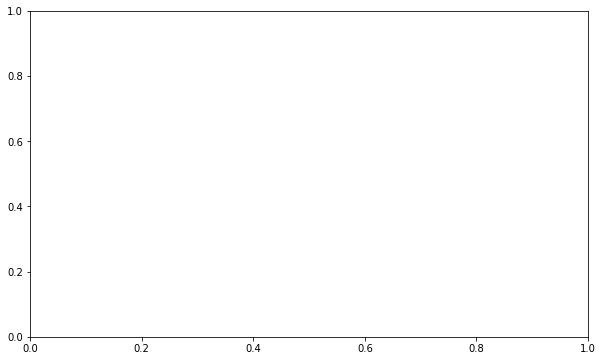

In [24]:
fig = plot_cross_validation_metric(df_cv, metric='mape')